References:
Electron Diffraction Theory:
https://www.doitpoms.ac.uk/tlplib/diffraction-patterns/printall.php

Indexing Diffraction Patterns
https://www.doitpoms.ac.uk/tlplib/diffraction-patterns/example1.php

Miller Indices:
https://web.iit.edu/sites/web/files/departments/academic-affairs/academic-resource-center/pdfs/Miller_Indices.pdf

Lattices:
http://cloud.crm2.univ-lorraine.fr/pdf/havana/5-LatticesContd.pdf

Crystal Lattice: 
http://rin.io/simple-cubic-lattice/

Zone axis:
https://en.wikipedia.org/wiki/Zone_axis

vpython:
https://www.glowscript.org/docs/VPythonDocs/index.html



### Physics 77 Capstone Project: Transmission Electron Microscope 


![alt text](p77img0.gif)
![alt text](p77img1.jpg)
![alt text](p77img2.jpg)

Image Source 1:https://www.ligo.caltech.edu/page/what-is-interferometer

Image Source 2:https://www.scienceabc.com/pure-sciences/interferometer-what-is-the-michelson-interferometer-experiment.html

Image Source 3:https://opentextbc.ca/physicstestbook2/chapter/single-slit-diffraction/

### Applications a

### BRAGG'S LAW OF X-RAY DIFFRACTION

![SegmentLocal](p77img3.gif "segment")

Image 4 Source: http://www.abhipod.com/researchpage/UGCMRP_05_06_ForWeb/elearningnode12.html

### Transmission Electron Microscope 

![SegmentLocal](p77img6.gif "segment")

Image 5 source: https://thumbs.gfycat.com/UltimateFarawayGoldenretriever-size_restricted.gif

![SegmentLocal](p77img5.png "segment")

Image 6 Source: https://www.researchgate.net/figure/Miller-indices-indicating-the-plane-perpendicular-to-the-vector-given-for-the-cubic_fig7_302838100

### Used a Polonium Sample, a Highly a radioactive element  with a simple cubic structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import itertools


from vpython import *
import numpy as np
import wx
from vpython import sphere,color


<IPython.core.display.Javascript object>

In [2]:
def normalize_v(v):
    '''
    normalize that vector dude
    '''
    return v/np.sqrt(v.dot(v))

def projection(a, b):
    '''
    find Projection of vector b onto a,
    assumes numpy arrays
    '''
    return (a.dot(b)*a)/(a.dot(a))

def project2plane(x, y):
    '''
    projects vector y onto the plane defined by x
    (x is orthogonal to desired plane)
    Accomplishes this by subtracting projection of y onto x
    from y
    Vector still in 3D basis
    '''
    return y - projection(x, y)

def change2plane_basis(zone_axis, hella_vectors):
    '''
    Forms new basis vectors
    zone_axis: orthogonal-to-plane vector, also direction of impinging electrons
    hella_vectors: set of miller indices for pre-selected diffraction planes
    each vector in hella_vectors represents a reciprocal lattice vector which
    satisfies Laue condition; in other words the directions of outgoing diffracted electron
    wavefunctions => each gets projected onto screen perpendicular to beam direction,
    so we calculate diffraction pattern as projection of reciprocal lattice vectors
    onto 2D plane corresponding to incoming beam
    '''
    random_v = np.array([np.pi, np.exp(1), np.sqrt(2)]) # irrational numbers will hopefully never be collinear
#    random_v = np.array([random.randint(0,20) for i in range(3)]) # hopefully not colinear
#    while np.allclose(normalize_v(random_v), normalize_v(zone_axis)): # if it is colinear, try again until u get it right
#        random_v = np.array([random.randint(0,20) for i in range(3)])
#        print(random_v)
   
    new_v1 = normalize_v(project2plane(zone_axis, random_v)) # thou hast now becometh our first basis vector
    new_v2 = normalize_v(np.cross(zone_axis, new_v1))
   
    flat_vs = np.zeros([len(hella_vectors), 2]) # empty array for new 2D vectors for plotting
    for i in range(len(hella_vectors)):
        flat_vs[i] = np.array([new_v1.dot(hella_vectors[i]), new_v2.dot(hella_vectors[i])]) # change of basis
    return flat_vs



Enter zone axis values (u, v, w):
1,1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/Users/yizelvizcarra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in remainder


<IPython.core.display.Javascript object>


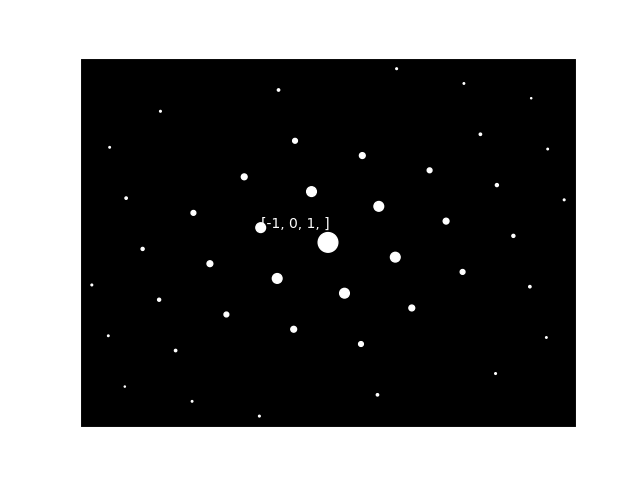

In [3]:
# given lattice direction [uvw], find (hkl) values such that Weiss Zone law fulliflled up to 2nd order:
# hu + kv + lw = 0, 1, or 2
#max_int = input('How many lattice subdivisions maximum to consider:\n')
max_int = 30
h = np.arange(-max_int,max_int + 1)
k = np.arange(-max_int,max_int + 1)
l = np.arange(-max_int,max_int + 1)
h, k, l = np.meshgrid(h,k,l)
uvw_string = input('Enter zone axis values (u, v, w):\n')

uvw = np.array([float(s) for s in uvw_string.split(',')])

# make new zone axis string for plot title:
uvw_list = [s.strip() for s in uvw_string.split(',')]
uvw_string = ""
for i in range(3):
    uvw_string += uvw_list[i]
    
uvw /= np.sqrt(uvw.dot(uvw)) # normalize the vector
u = uvw[0]
v = uvw[1]
w = uvw[2]




scene = canvas(userzoom = False ,center =vector(0,0,0),range=10,fov=2*np.pi/3,userspin = False, forward = vector(u,v,w),resizable=True)

range_length= 5
radius = 0.2

for i in range(-range_length,range_length+1,2):
    for j in range(-range_length,range_length+1,2):
        for kk in range(-range_length,range_length+1,2):
            sphere(pos=vector(i,j,kk),radius=radius,color =vector(1,1,0))
            
            
            

arrow(pos=vector(0,0,0), axis=vector(-3,0,0), shaftwidth=.2,color =vector(1,0,0),center =vector(0,0,0))
arrow(pos=vector(0,0,0), axis=vector(0,-3,0), shaftwidth=.2,color =vector(0,1,0),center =vector(0,0,0))
arrow(pos=vector(0,0,0), axis=vector(0,0,-3), shaftwidth=.2,color =vector(0,0,1),center =vector(0,0,0))






# apply the Weiss zone law:
weiss = u*h + v*k + w*l

# Select miller indices with good shit:
H = h[weiss == 0]
K = k[weiss == 0]
L = l[weiss == 0]

planes = np.array([[H[i], K[i], L[i]] for i in range(round(len(H)))])

### Family-finding algorithm starts here ####

# keep just one of each set of planes that are negative multiples of each other:
indices = np.arange(len(planes)) 
med_index = int(np.median(indices))
reduced_planes = planes[:med_index] # get rid of redundant planes and trivial plane


reduced_planes = reduced_planes[np.argsort(np.mean(abs(reduced_planes), 1))]


indices = [0]
done = False
families = []

# shove all remaining unpleasantries into a while loop:

while done == False:
    fam = reduced_planes[0]
    families.append(fam)

    # remove miller indicies of planes in the same family:
    for i,miller in enumerate(reduced_planes):
        if np.all(miller%fam == planes[med_index]): # since median is [000]
            indices.append(i)
    reduced_planes = np.delete(reduced_planes, indices, 0)
    if len(reduced_planes) == 0:
        done = True

### family-finding algorithm ends here ###    


fam_points = change2plane_basis(uvw, families) # 2D coordinates of family
fam_point_labels = []
for miller in families:
    label = ""
    some_random_list = [str(num) for num in miller]
    for item in some_random_list:
        label += item + ', '
    fam_point_labels.append('['+label+']')


plt.style.use('dark_background')

points = change2plane_basis(uvw, planes)
points_radii = np.array([np.sqrt(x.dot(x)) for x in points])
brightness = 200.*np.exp(-points_radii)
%matplotlib notebook
plt.title('Zone Axis: [{}]'.format(uvw_string))
plt.scatter(points[:,0], points[:,1], c ='w', s = brightness)

for i in range(len(fam_point_labels)):

    plt.text(fam_points[i,0], fam_points[i,1], fam_point_labels[i])
  
    

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

### 

# Welcome to the Code Graveyard!
## Here lies code that was just kinda meh, but will live on forever in our memories

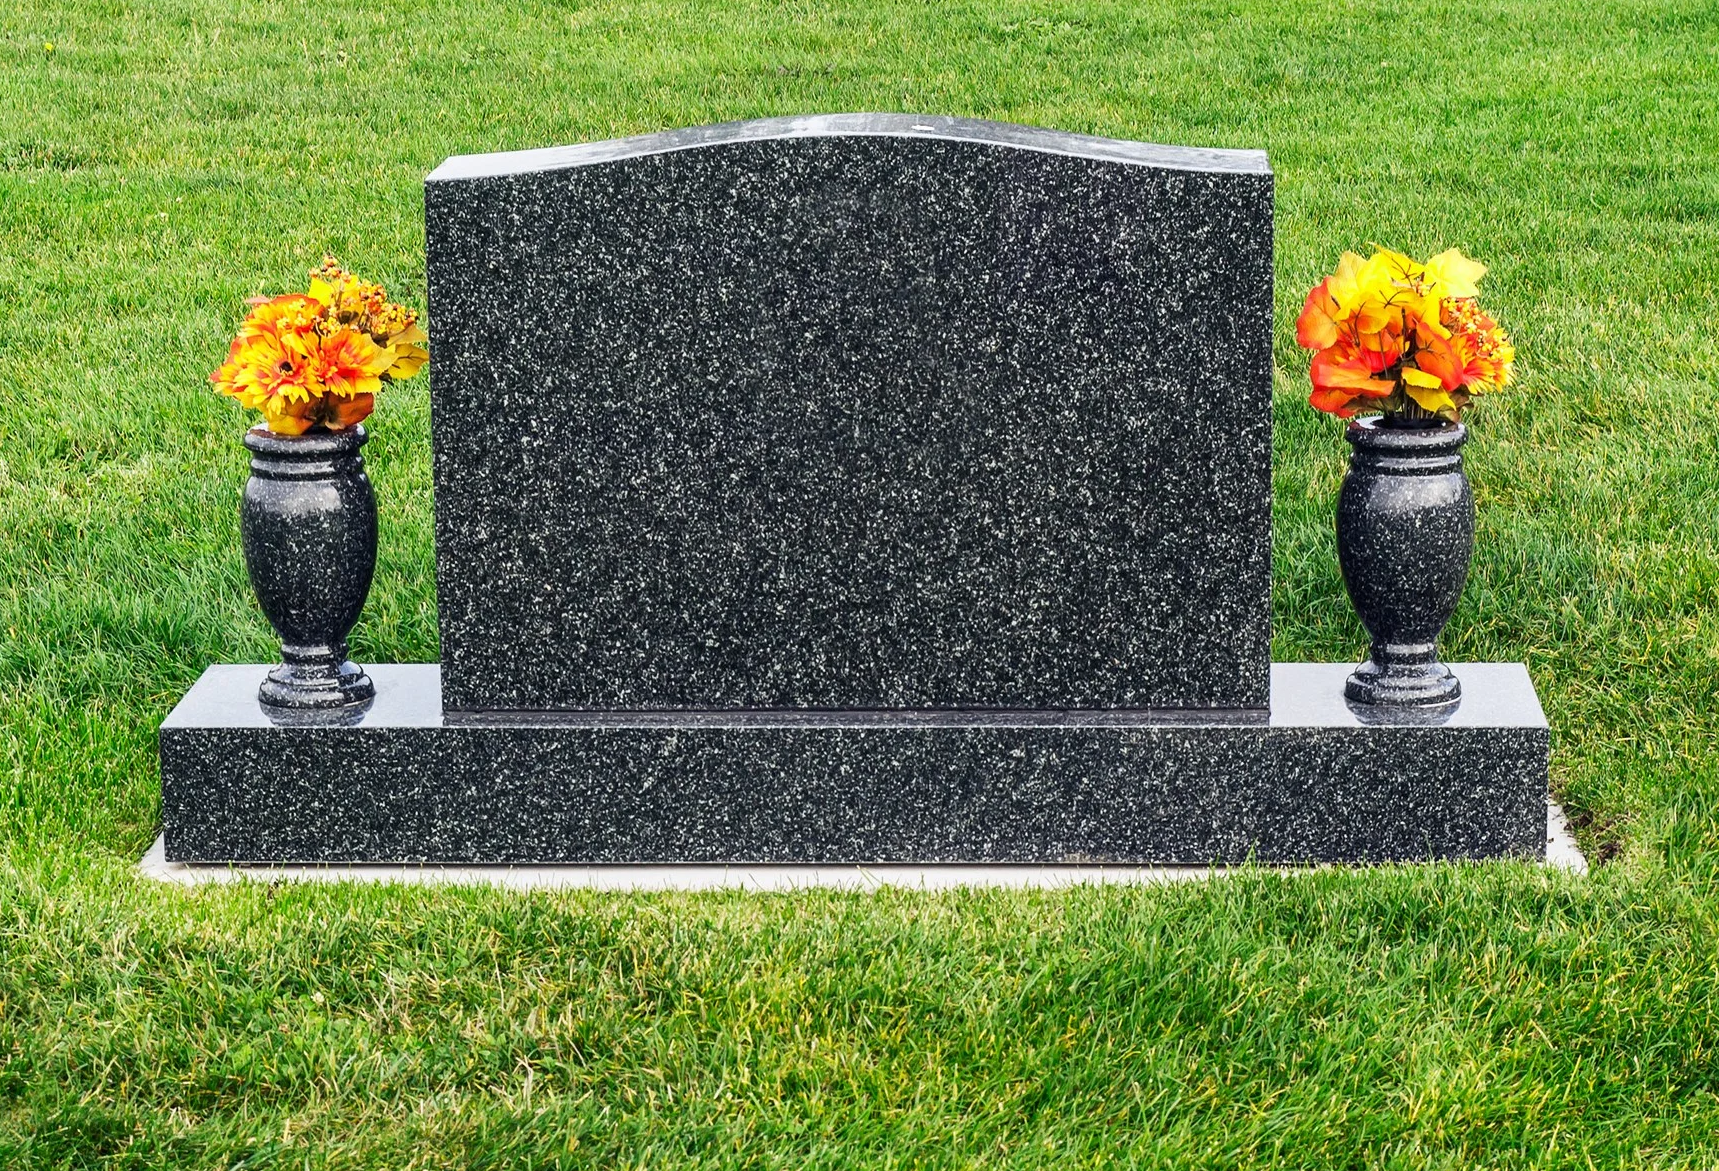

In [ ]:
# image source: 
# https://www.wired.com/2016/10/want-tombstone-last-forever-make-quartzite/

Enter zone axis values (u, v, w):
1,1,1


C:\Users\ninet\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in remainder


<IPython.core.display.Javascript object>


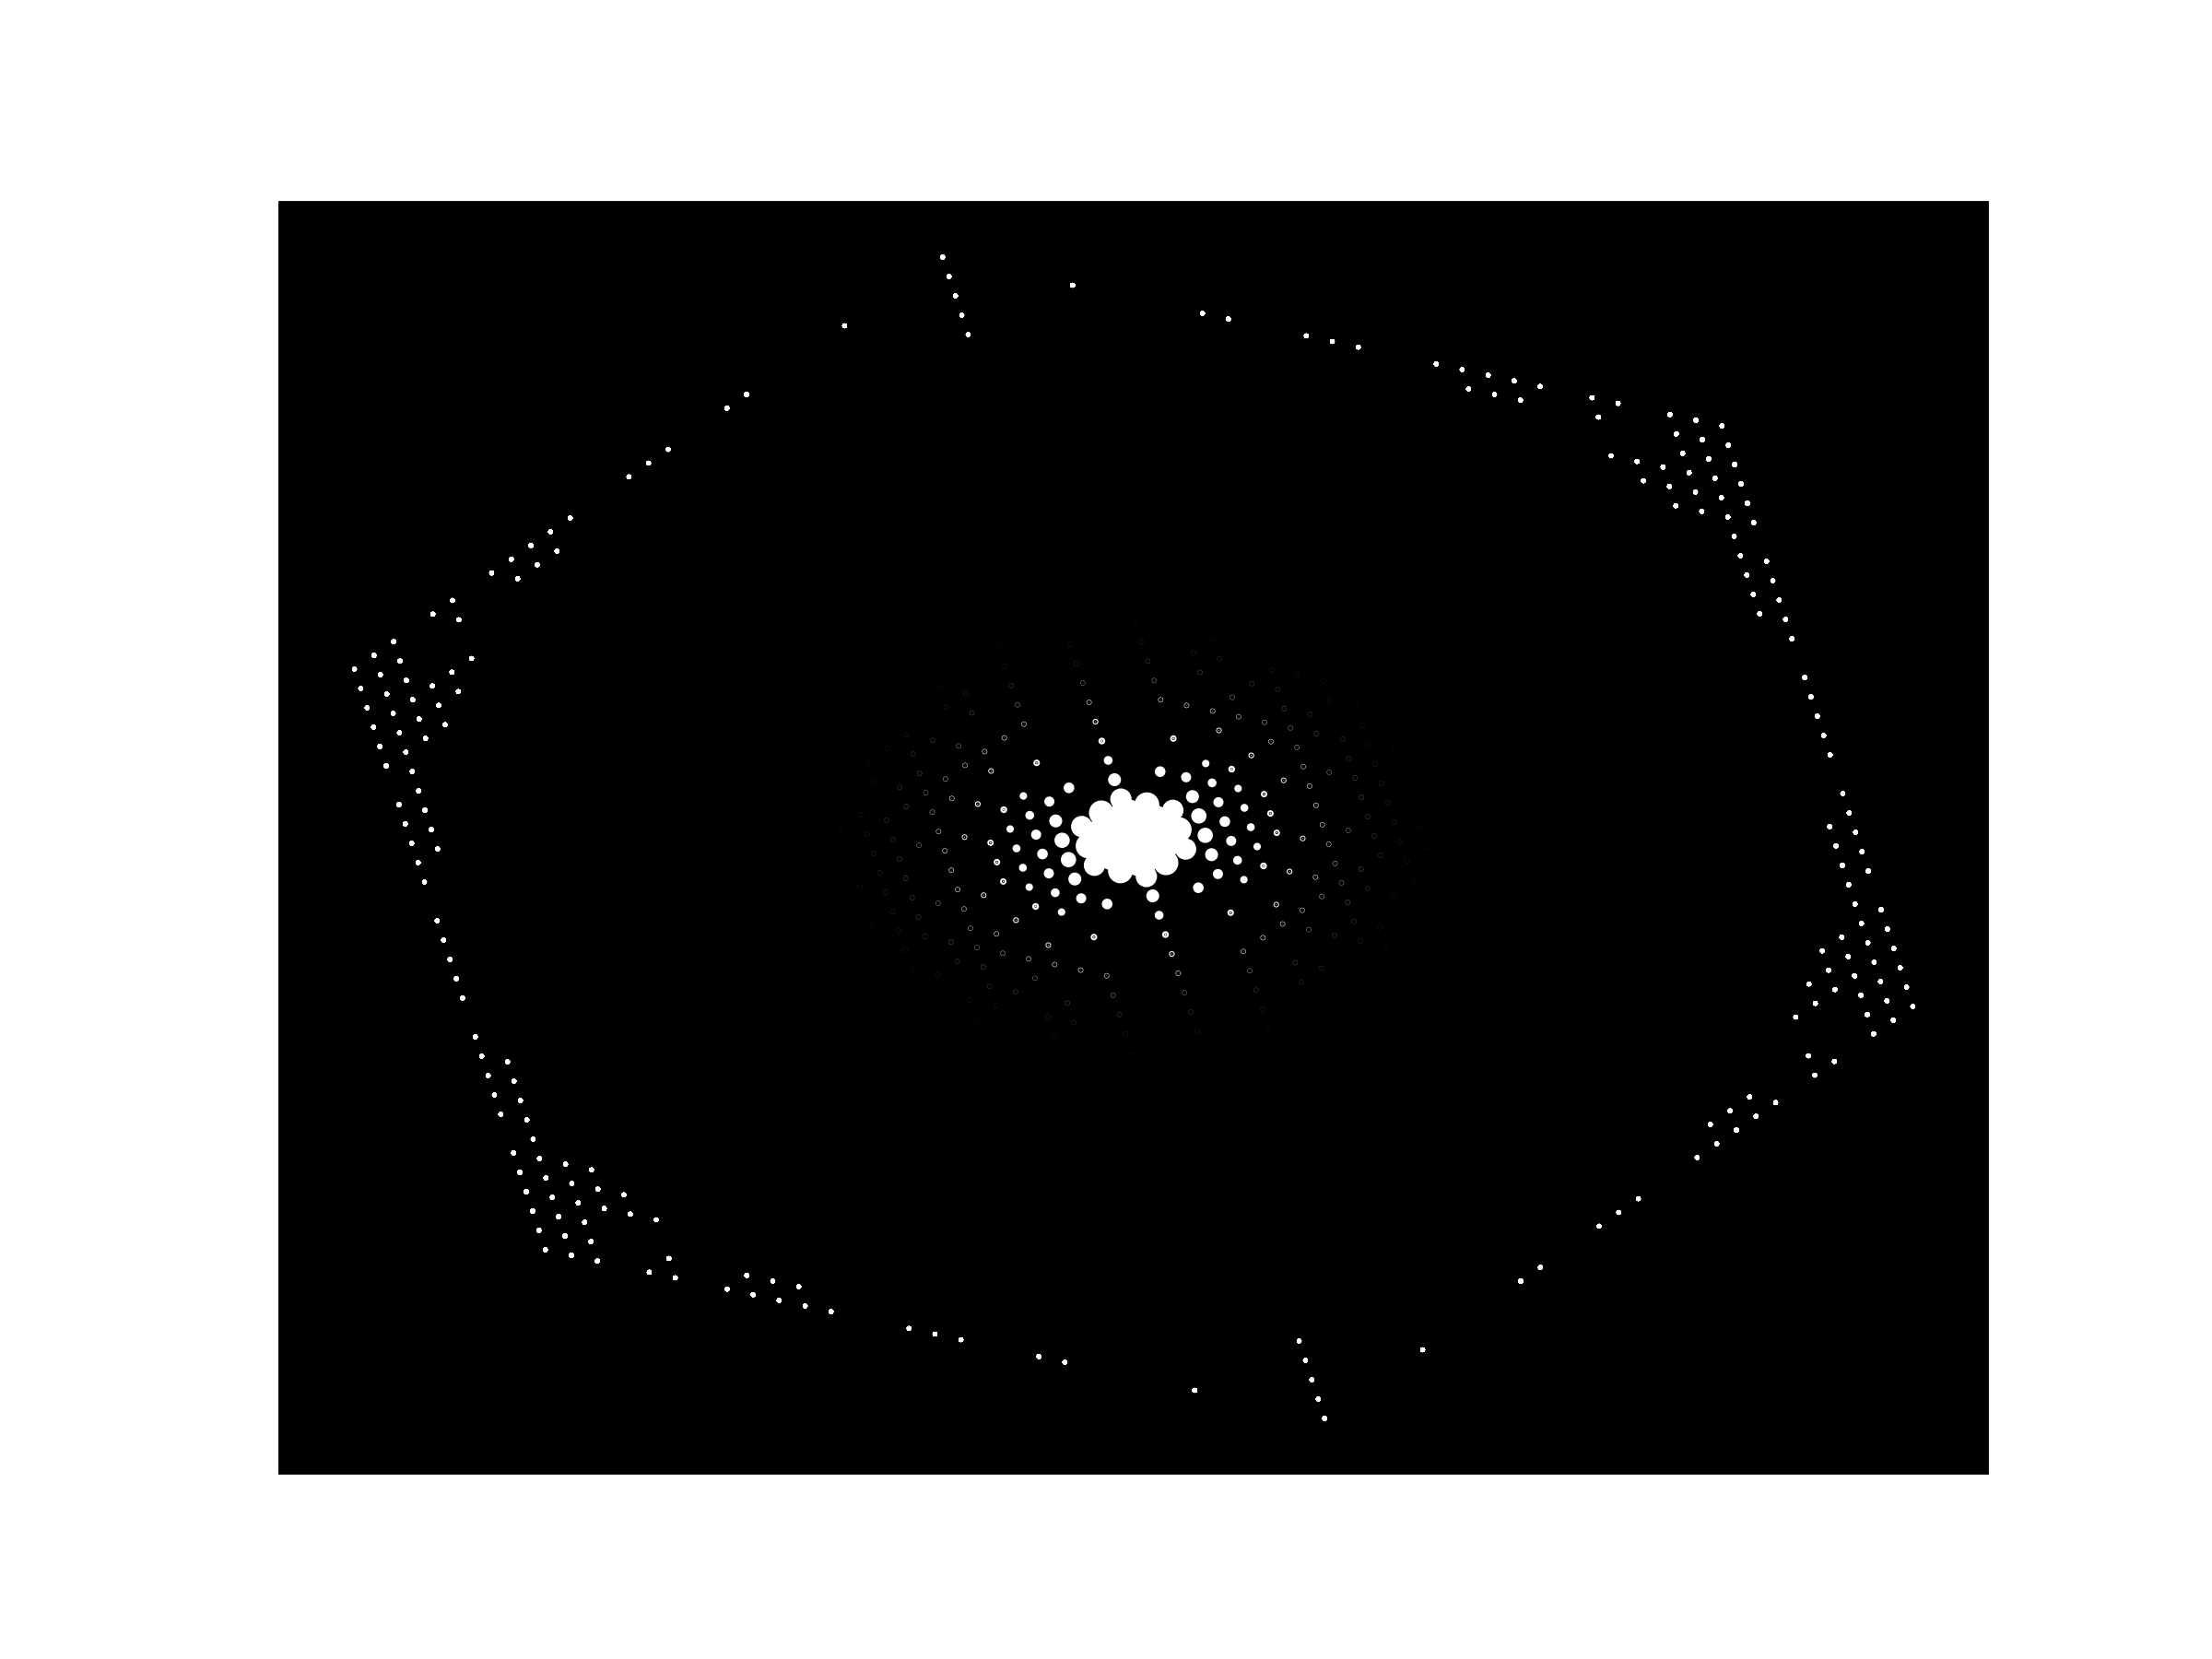

NameError: name 'fam_points' is not defined

In [4]:
max_int = 30
h = np.arange(-max_int,max_int + 1)
k = np.arange(-max_int,max_int + 1)
l = np.arange(-max_int,max_int + 1)
h, k, l = np.meshgrid(h,k,l)
uvw_string = input('Enter zone axis values (u, v, w):\n')

uvw = np.array([float(s) for s in uvw_string.split(',')])

# make new zone axis string for plot title:
uvw_list = [s.strip() for s in uvw_string.split(',')]
uvw_string = ""
for i in range(3):
    uvw_string += uvw_list[i]
    
uvw /= np.sqrt(uvw.dot(uvw)) # normalize the vector
u = uvw[0]
v = uvw[1]
w = uvw[2]

# apply the Weiss zone law:
weiss = u*h + v*k + w*l

# Select miller indices with good shit:
H = h[weiss == 0]
K = k[weiss == 0]
L = l[weiss == 0]

planes = np.array([[H[i], K[i], L[i]] for i in range(round(len(H)))])

### Family-finding algorithm starts here ####

# reduce planes into plane families:
indices = np.arange(len(planes)) 
med_index = int(np.median(indices))
reduced_planes = planes[:med_index] # get rid of redundant planes and trivial plane
reduced_planes = reduced_planes[np.argsort(np.sum(abs(reduced_planes), 1))]

indices = [0]
done = False
families = []

while done == False:
    fam = reduced_planes[0]
    families.append(fam)

    # remove miller indicies of planes in the same family:
    for i,miller in enumerate(reduced_planes):
        if np.all(miller%fam == planes[med_index]): # since median is [000]
            indices.append(i)
    reduced_planes = np.delete(reduced_planes, indices, 0)
    if len(reduced_planes) == 0:
        done = True
        
### family-finding algorithm ends here ###    

fam_point_labels = []

for miller in families:
    label = ""
    some_random_list = [str(num) for num in miller]
    for item in some_random_list:
        label += item + ', '
    fam_point_labels.append('['+label[:-2]+']')
points = change2plane_basis(uvw, planes)
points_radii = np.array([np.sqrt(x.dot(x)) for x in points])
brightness = 200.*np.exp(-points_radii)
%matplotlib notebook
plt.title('Zone Axis: [{}]'.format(uvw_string))
plt.scatter(points[:,0], points[:,1], c ='w', s = brightness)

for i in range(len(fam_point_labels)):

    plt.text(fam_points[i,0], fam_points[i,1], fam_point_labels[i])
  
    

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [9]:
print(reduced_planes)

[]


In [7]:
print('planes:')
print(planes)
print('fams:')
print(families)

planes:
[[  0   1  -1]
 [  1 -30  29]
 [  2 -30  28]
 ...
 [ -2  30 -28]
 [ -1  30 -29]
 [  0  30 -30]]
fams:
[array([ 0,  1, -1])]


# Cells below are good for determining all hlk planes that diffract

In [84]:
# given lattice direction [uvw], find (hkl) values such that Weiss Zone law fulliflled up to 2nd order:
# hu + kv + lw = 0, 1, or 2
#max_int = input('How many lattice subdivisions maximum to consider:\n')
max_int = 30
h = np.arange(-max_int,max_int + 1)
k = np.arange(-max_int,max_int + 1)
l = np.arange(-max_int,max_int + 1)
h, k, l = np.meshgrid(h,k,l)

In [7]:
H = h[weiss == 0]
K = k[weiss == 0]
L = l[weiss == 0]

planes = np.array([[H[i], K[i], L[i]] for i in range(round(len(H)))])


In [87]:
# reduce planes into plane families:
indices = np.arange(len(planes)) 
med_index = int(np.median(indices))
reduced_planes = planes[:med_index] # get rid of redundant planes and trivial plane
reduced_planes = reduced_planes[np.argsort(np.sum(abs(reduced_planes), 1))]

indices = [0]
done = False
families = []

while done == False:
    fam = reduced_planes[0]
    families.append(fam)

    # remove miller indicies of planes in the same family:
    for i,miller in enumerate(reduced_planes):
        if np.all(miller%fam == planes[med_index]): # since median is [000]
            indices.append(i)
    reduced_planes = np.delete(reduced_planes, indices, 0)
    if len(reduced_planes) == 0:
        done = True
        
#print(families)      

C:\Users\ninet\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in remainder
C:\Users\ninet\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


<IPython.core.display.Javascript object>


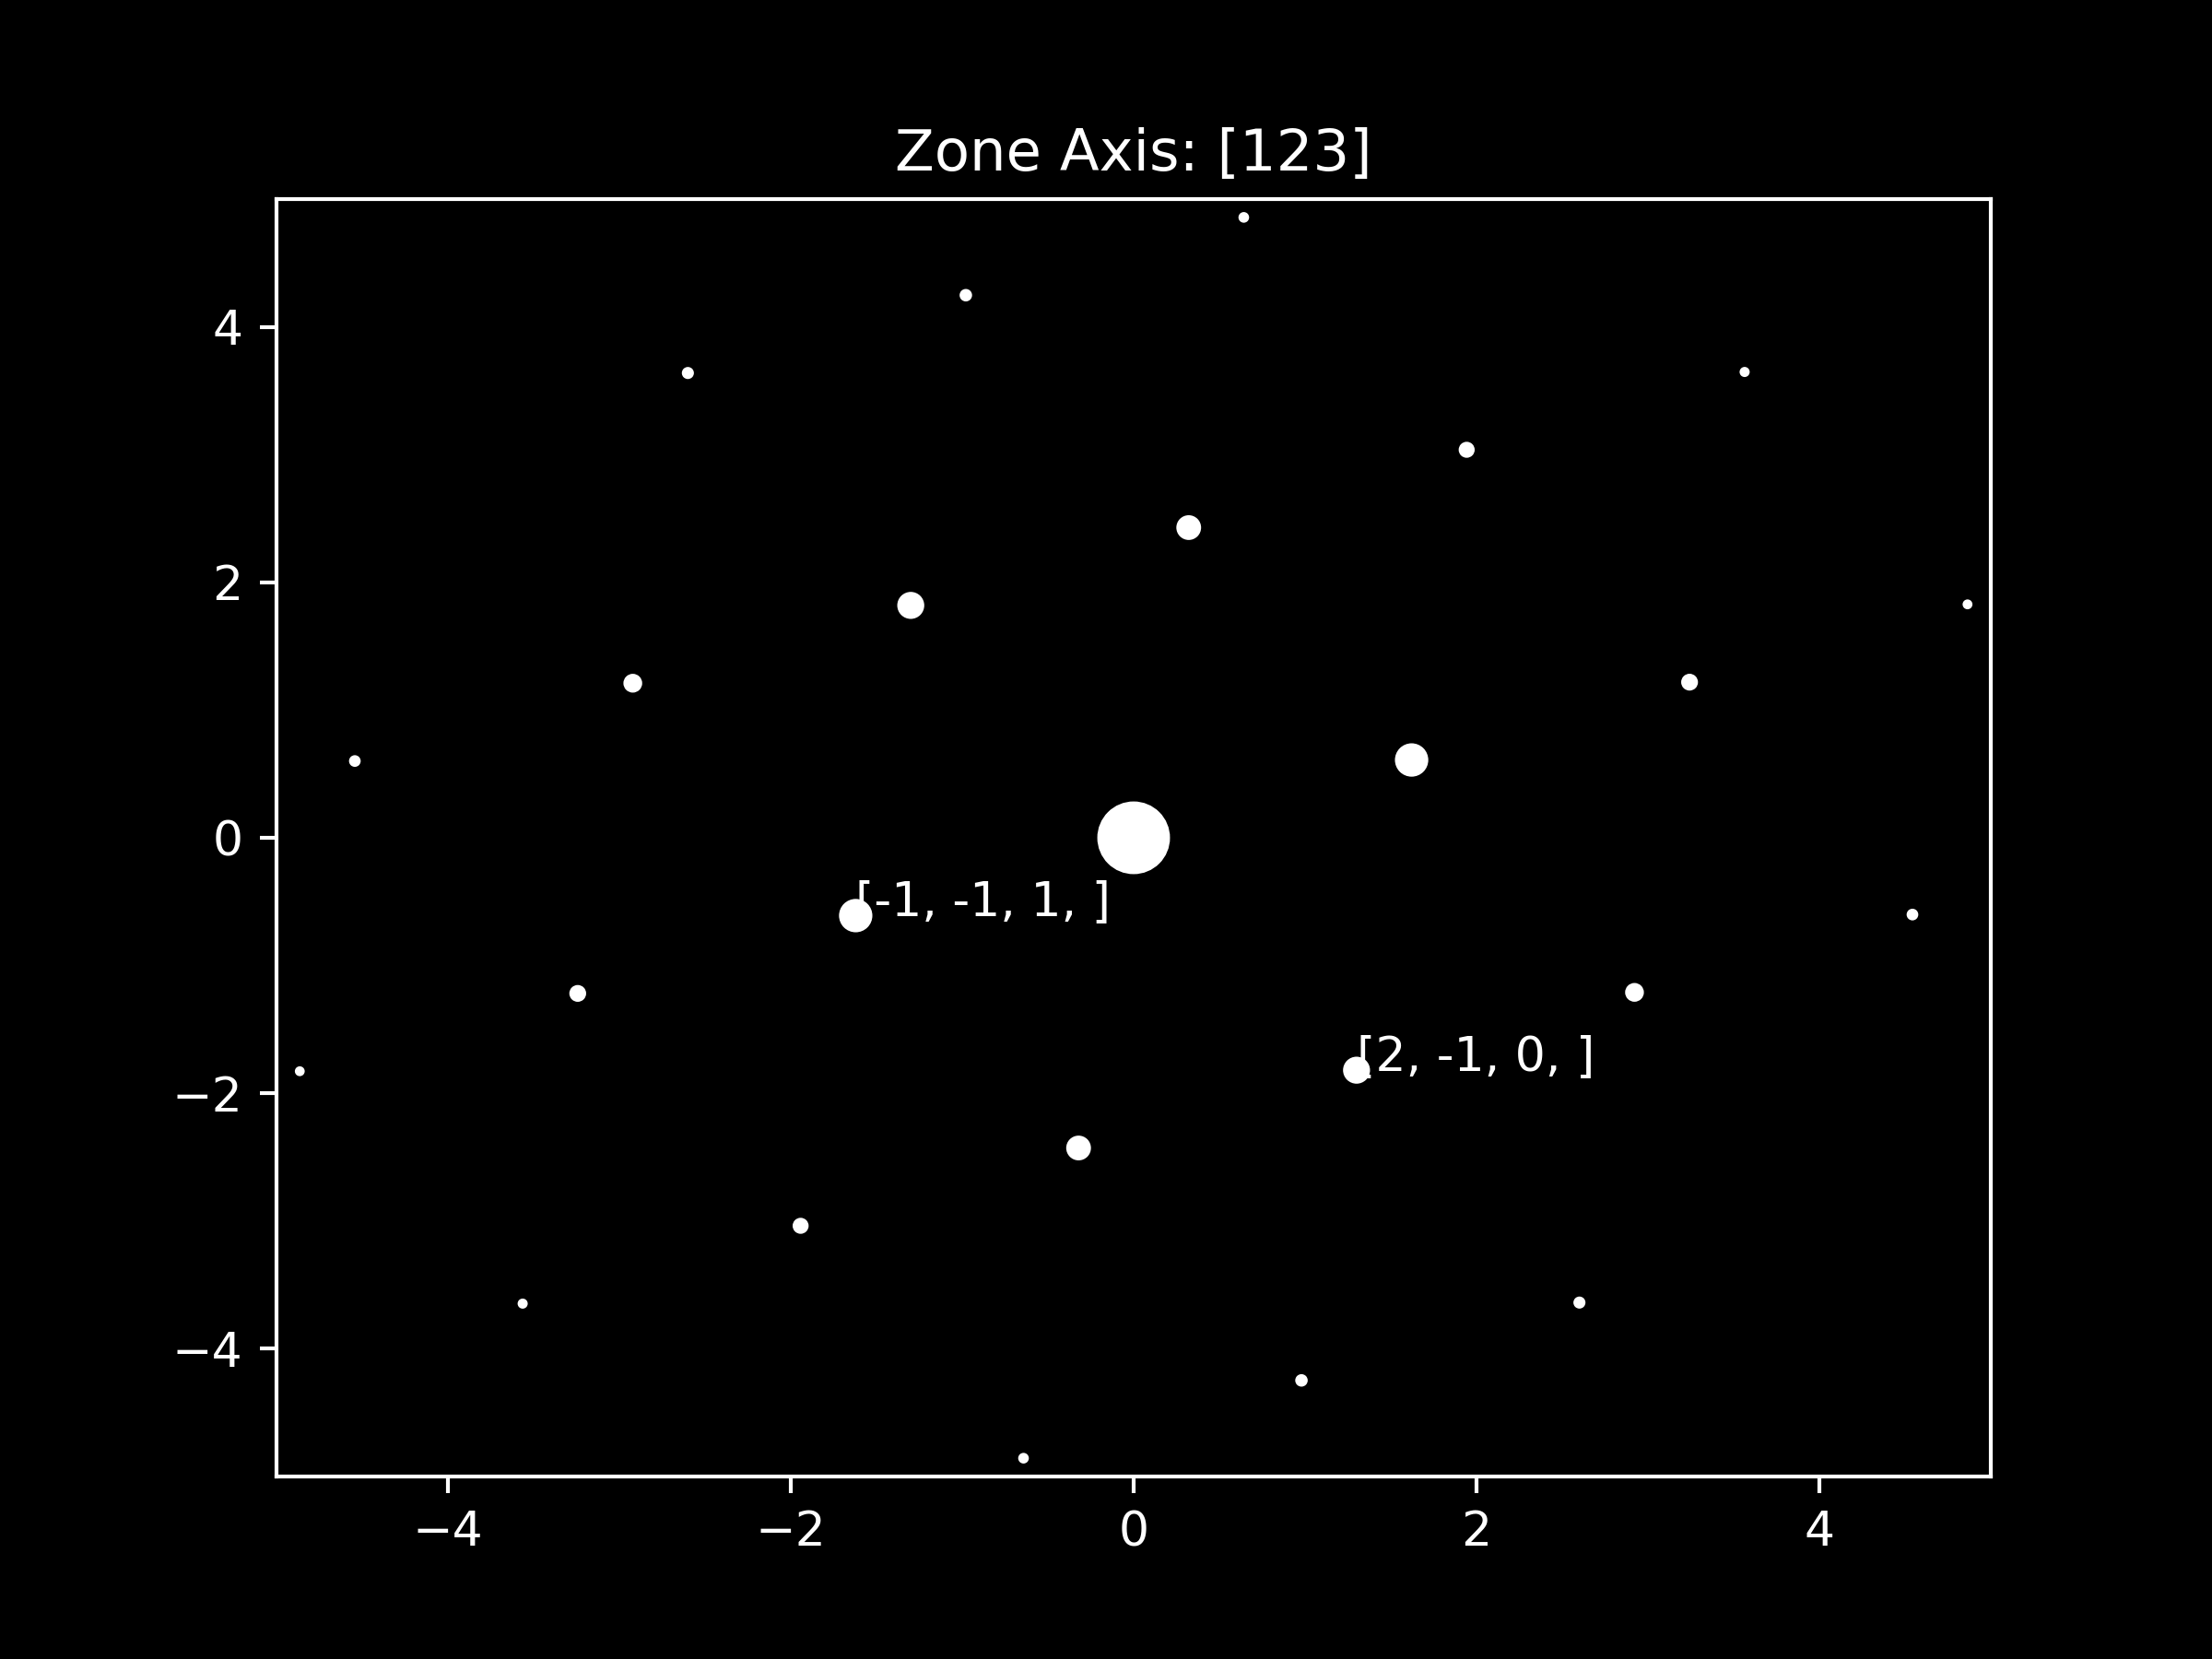

In [92]:
plt.style.use('dark_background')
overbar = '\u0305'
fam_points = change2plane_basis(uvw, families) # 2D coordinates of family
fam_point_labels = []
negative_signs = []
negative_sign_loc = []
for miller in families:
    label = ""
    some_random_list = [str(num) for num in miller]
    for item in some_random_list:
    #    if item[0] == '-':
    #        item = item[1:] # get rid of negative sign
    #        negative_signs.append(i) # store index of plane w neg signs
    #        negative_sign_loc.append(j) # store position of specific index w negative sign
        label += item + ', '
    fam_point_labels.append('['+label+']')

points = change2plane_basis(uvw, planes)
points_radii = np.array([np.sqrt(x.dot(x)) for x in points])
brightness = 200.*np.exp(-points_radii)
%matplotlib notebook
plt.title('Zone Axis: [{}]'.format(uvw_string))
plt.scatter(points[:,0], points[:,1], c ='w', s = brightness)

for i in range(len(fam_point_labels)):
    #print(fam_point_labels[i])
    plt.text(fam_points[i,0], fam_points[i,1], fam_point_labels[i])

# add negative signs:
# height = 0.08
# 3333width = 0.22

for i in range(len(negative_signs)):
    #print(fam_points[negative_signs[i]])
    plt.text(fam_points[negative_signs[i], 0] + width*(negative_sign_loc[i] + 1), 
             fam_points[negative_signs[i], 1] + height, overbar, fontsize = 10)
        
    
    
    
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

In [89]:
print(families)
print(negative_sign_loc)

[array([ 2, -1,  0]), array([-1, -1,  1])]
[1, 0, 1]


# Constructing diffraction patterns using physics and list of diffraction planes:
- "planes" array contains reciprocal lattice coordinates corresponding to diffraction points, so just need to project them onto plane defined by zone axis direction.
- plane projection we want is the plane (uvw)* (in reciprocal space).
- this can be accomplished by subtracting (hkl) component a long (uvw) from (hkl) 
- first, find vector basis for zone axis (two orthogonal vectors to (uvw))
- go through list of diffraction planes, project onto basis 

In [3]:
a = 3.36 # lattice parameter (Angstroms)
screen_dist = 1e12 # distance from sample to film, using random value for now since not that important (Angstroms)
wavelength = 0.06 # using typical value, need to add parameter feature (Angstroms)
real_basis = a*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
reciprocal_basis = (2*np.pi/a)*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [5]:
# delete extra points layer-by layer:
#num_layers = 2.*50./(a)
even_layers = []
odd_layers = []
c_height = 1 #appropriate unit cell height, should be lattice parameter but test with one for now
for i in range(len(triplets)):
    coordset = triplets[i]
    # even layers:
    if coordset[2]%2 == 0:
        # keep corners -> only points that are not multiples of 2:
        if coordset[0]%2 == 1:
            if coordset[1]%2 == 1:
                #coordset[2] = coordset[2]/2 * c_height
                even_layers.append(coordset)
    # odd layers:
    elif coordset[2]%2 == 1:
        # keep midpoints -> only points that are multiples of 2:
        if coordset[0]%2 == 0:
            if coordset[0]%2 == 0:
                #coordset[2] = coordset[2]/2 * c_height
                odd_layers.append(coordset)


In [8]:
triplets[:]

array([[-10, -10, -10],
       [-10, -10,  -9],
       [-10, -10,  -8],
       ...,
       [ 10,  10,   8],
       [ 10,  10,   9],
       [ 10,  10,  10]])

In [17]:
odd_layers[21]

array([-10,  -8,  -7])

<IPython.core.display.Javascript object>


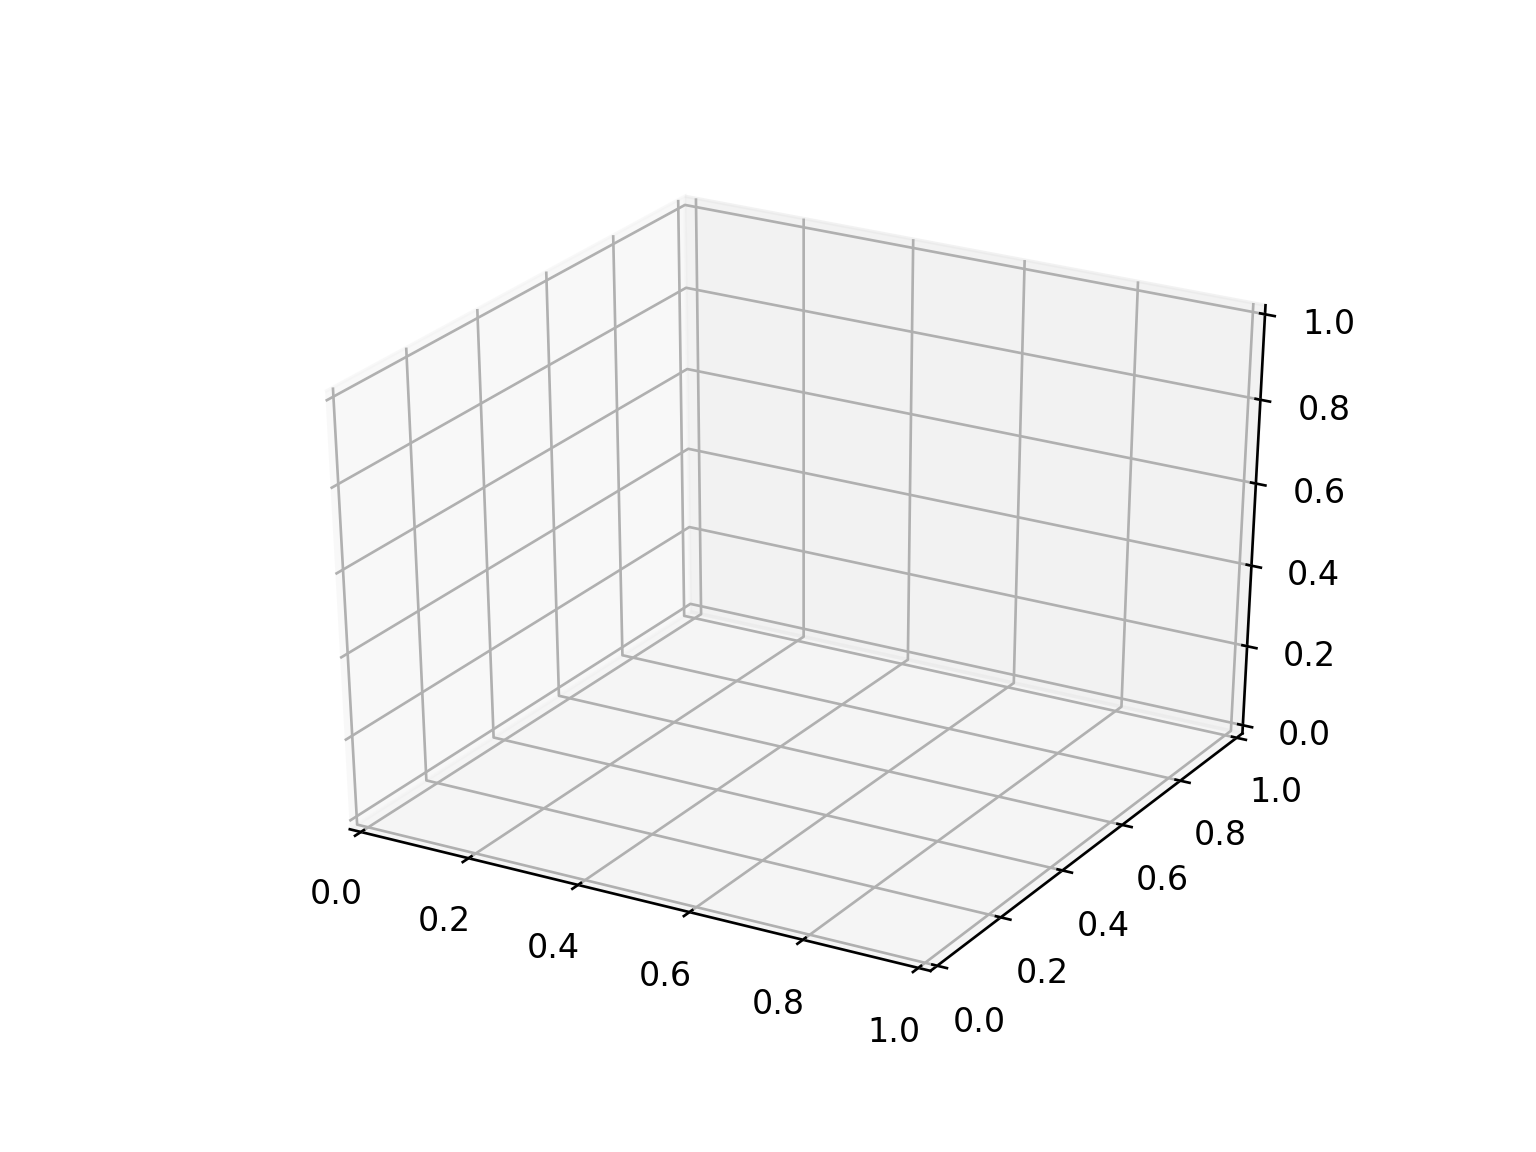

TypeError: list indices must be integers or slices, not tuple

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(even_layers[:,0], even_layers[:,1], even_layers[:,2], c = 'blue')
ax.scatter(odd_layers[:,0], odd_layers[:,1], odd_layers[:,2], c = 'orange')
plt.show()